# Analysis on data aquired

<p>In this notebook we analyze the data parsed from all sources found in order to explain how during this COVID-19 epidemic the countries around the world have performed test to found infects.<br>
</p>

# Target Questions

Clustr:
    Identificare i cluster che distinguono i vari paesi a seconda di come abbiano affrontato questa epidemia, provare a trovare una correlazione se paesi che abbiano adottato politiche simili abbiano ottenuto gli stessi risulati
    
    1)Lasso di tempo
    2)Test effettuati pro capite
    3)Test positivi in percentuale 
    4)Politiche adottate
    5)GDP pro capite
    6)Età media

In [1]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_data.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb
%run world_population.ipynb

C:\Users\Eric Boccati\OneDrive\Università\Data science for business\project\data


D:\Programmi\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Data used
We imported data from different country and grouped having the same columns name and arranged by date with the same structure

Those are database that we used to collect data from:

## Italy (national and regional)
### Updated: 25/04/2020
Source : https://github.com/pcm-dpc/COVID-19 

## USA:
### Updated: 24/04/2020
Source : https://github.com/COVID19Tracking/covid-tracking-data 

## UK:
### Updated: 29/04/2020
Source : https://github.com/tomwhite/covid-19-uk-data 

## Brazil:
### Updated: 30/03/2020
Source : https://www.kaggle.com/unanimad/corona-virus-brazil
<ul><b>Dataset not updated</b></ul>

## SK:
### Updated: 20/04/2020
Source : https://www.kaggle.com/kimjihoo/coronavirusdataset 

## Indonesia:
### Updated: 31/03/2020
Source : https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases
<ul><b>Dataset not updated</b></ul>

## India:
### Updated: 30/04/2020
Source : https://www.kaggle.com/sudalairajkumar/covid19-in-india 

More details about the columns we used for each dataset are listed in the README file.

# Sorted CSV

Structure of dataset are same for national and regional scale, below the explanation of columns: <br>
<ul>
<li><b>total_cases: </b>cumulative number of infect<br></li>
<li><b>daily_cases: </b>daily new infect<br></li>
<li><b>actual_cases: </b>people actually infect<br></li>
<li><b>total_healed: </b>cumulative number of healed<br></li>
<li><b>daily_healed: </b>daily number of healed<br></li>
<li><b>total_dead: </b>cumulative number of dead<br></li>
<li><b>daily_dead: </b>daily number of dead<br></li>
<li><b>total_home_isolation: </b>cumulative number of people forced to home isolation<br></li>
<li><b>daily_home_isolation: </b>daily number of people forced to home isolation, variation between day before, can be negative<br></li>
<li><b>total_recovered_with_symptoms: </b>cumulative number of people recovered with symptoms<br></li>
<li><b>daily_recovered_with_symptoms: </b>daily number of people recovered with symptoms, variation between day before, can be negative<br></li>
<li><b>total_intensive_care: </b>cumulative number of people in intesive care<br></li>
<li><b>daily_intensive_care: </b>daily number of people in intesive care, variation between day before, can be negative<br></li>
<li><b>total_hospitalized: </b>cumulative number of hospitalized: simple recover + intensive care<br></li>
<li><b>daily_hospitalized: </b>daily number of hospitalized: simple recover + intensive care, variation between day before, can be negative<br></li>
<li><b>total_test: </b>cumulative number of test made<br></li>
<li><b>daily_test: </b>daily number of test made<br></li>
</ul>

Not every CSVs have all the columns listed above, due to limited data avaiable.

# Import Covid related CSVs

In [17]:
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [3]:
%cd data

[WinError 2] The system cannot find the file specified: 'data'
C:\Users\Eric Boccati\OneDrive\Università\Data science for business\project\data


In [4]:
states = ["india","italy","brazil","indonesia","south_korea","united_kingdom","usa"]

not_updated = ["brazil", "indonesia"]

states = set(states) - set(not_updated)

states = list(states)

In [5]:
state_csv = {}
italian_regions_csv = {}

for state in states:
    path = os.getcwd() + "/parsed_data/"
    path += state + "/" + state + ".csv" 
    path = path.replace("/",os.path.sep)
    state_csv[state] = pd.read_csv(path, index_col = 0)
    
path = os.getcwd() + "/parsed_data/italy/"
path = path.replace("/",os.path.sep)

all_csv = glob.glob(path + "*.csv")
all_csv.remove(path + "italy.csv")

for file in all_csv:
    result = os.path.basename(file).replace('.csv','')
    italian_regions_csv[result] = pd.read_csv(file, index_col = 0)

# Other data used

We collect other useful information that could help us to investigate different scenario:
<ul>
    <li><b>GDP</b>: Data from 2018</li>
    Source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
<li><b>Population</b></li>
    <ul>
    <li>Number of people</li>
    <li>Age</li>
    Source: https://population.un.org/wpp/Download/Standard/CSV/
    </ul></ul>
We extract the information needed and parsed into new csv files through the code in /world_population.ipynb

# Import other data CSVs

In [213]:
path_gdp = os.getcwd() + "/parsed_data/world/GDP.csv"
path_population = os.getcwd() + "/parsed_data/world/Population.csv"
path_lockdown = os.getcwd() + "/parsed_data/world/Lockdown.csv"
path = path.replace("/",os.path.sep)

gdp = pd.read_csv(path_gdp, index_col = 0)
population = pd.read_csv(path_population, index_col = 0)
lockdown = pd.read_csv(path_lockdown, index_col = 0)
lockdown.columns = ['Country', 'Date_Start', 'Date_end_intended',
       'Description', 'Keywords']

In [209]:
lockdown.head(50)

,Country,Date_Start,Date end intended,Description of measure implemented,Keywords
ID,,,,,
578.0,United Kingdom,"Mar 20, 2020",NaN,"All schools, nurseries and colleges closed.",nursery school closure
372.0,United Kingdom,"Mar 16, 2020",NaN,If one person in any household has a persisten...,blanket isolation - symptoms
357.0,United Kingdom,"Mar 16, 2020",NaN,"By the weekend, those with the most serious he...",isolation advice to elderly
356.0,United Kingdom,"Mar 16, 2020",NaN,Everyone should avoid gatherings with friends ...,"public announcement, social distancing"
373.0,United Kingdom,"Mar 14, 2020",NaN,People who are self-isolating with mild sympto...,"end of testing, testing criteria tightened"
355.0,United Kingdom,"Feb 26, 2020",NaN,Britons returning from northern Italy told to ...,international traveller quarantine - risk coun...
603.0,United Kingdom,"Mar 18, 2020","Apr 18, 2020",The Foreign & Commonwealth Office (FCO) advise...,outbound travel warning
724.0,South Korea,"Mar 21, 2020",NaN,"Korean government asked religious activities, ...",religious activity limitations
NaN,South Korea,"Mar 17, 2020",NaN,"Child cares, Kindergartens- remain to be close...",school closure


In [210]:
unique_values = pd.unique(lockdown["Keywords"])
all_keywords = []

for row in lockdown.iterrows():
    row_keywords_found = row[1][4].split(",")
    all_keywords += row_keywords_found
    
dummy_all_keywords = all_keywords.copy()
all_keywords = []
meaningfull_keywords = ['closure','distancing','quarantine','remote', 'isolation', 'hospital', 'hygiene', 'medical', 'suspension']
for keyword in dummy_all_keywords:
    for meaningfull_keyword in meaningfull_keywords:
        if meaningfull_keyword in keyword.split():
            keyword = keyword.strip()
            all_keywords.append(keyword)
    

all_keywords = list(dict.fromkeys(all_keywords))    

len(all_keywords)

36

In [239]:
result = pd.DataFrame([(d, tup.Country,tup.Date_Start,tup.Date_end_intended) for tup in lockdown.itertuples() for d in tup.Keywords.split(", ")])
result.columns = ["keyword","country","date_start","date_end_intended"]
result.head(30)
result2 = pd.DataFrame([(tup.keyword, tup.country, tup.date_start, tup.date_end_intended) for tup in result.itertuples()if tup.keyword in all_keywords])
result2.columns = ["keyword","country","date_start","date_end_intended"]


In [246]:
result2[result2["country"]=="Italy"]

,keyword,country,date_start,date_end_intended
40,general nonessential business suspension,Italy,"Mar 12, 2020","Mar 25, 2020"
41,general nonessential business suspension,Italy,"Mar 12, 2020","Mar 25, 2020"
42,school closure,Italy,"Mar 08, 2020","Apr 04, 2020"
43,university closure,Italy,"Mar 08, 2020","Apr 04, 2020"
47,limited nonessential business suspension,Italy,"Feb 22, 2020",NaN
48,cluster isolation - no symptoms,Italy,"Feb 22, 2020",NaN
49,compulsory isolation,Italy,"Feb 22, 2020",NaN
50,school closure,Italy,"Feb 22, 2020",NaN
51,university closure,Italy,"Feb 23, 2020","Mar 01, 2020"
52,remote work - limited,Italy,"Feb 24, 2020",NaN


# Plot data

## First impression

We would like to compare the number of test performed by each nation with the number of total infected people

In [8]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-04-20")
    test = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
    
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

The graph below show the comparison between the results obtained from each state

Text(0.5, 1.0, 'Barplot of total test and cases for each nation')

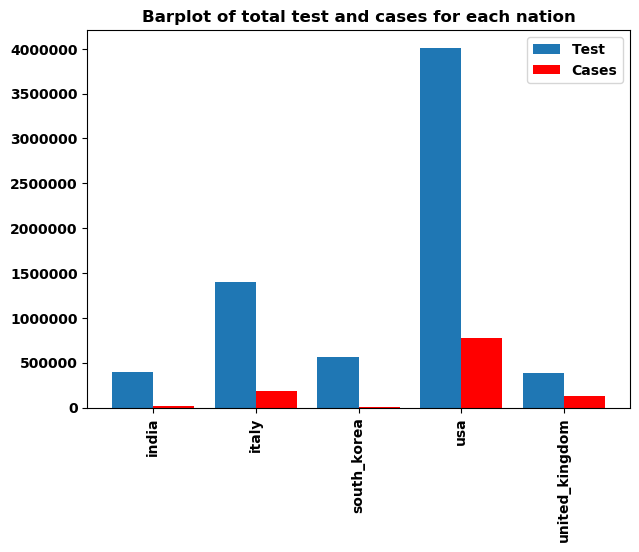

In [9]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)

ind = np.arange(len(df.index))
plt.bar(ind-0.2, width=0.4, height=df.total_test)
plt.bar(ind+0.2, width=0.4, height=df.total_cases, color = "r")
plt.legend(["Test", "Cases"])

idx = df.index.values
idx = np.insert(idx, 0, "null") #Just to shift elements
axes.set_xticklabels(idx)

plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases for each nation')

The <b>next graph</b> instead shows the percentage of positive, we can see that south korea has done many test with the results of a lower positivity index

Text(0.5, 1.0, 'Barplot of total test and cases on 20/04/2020 in %')

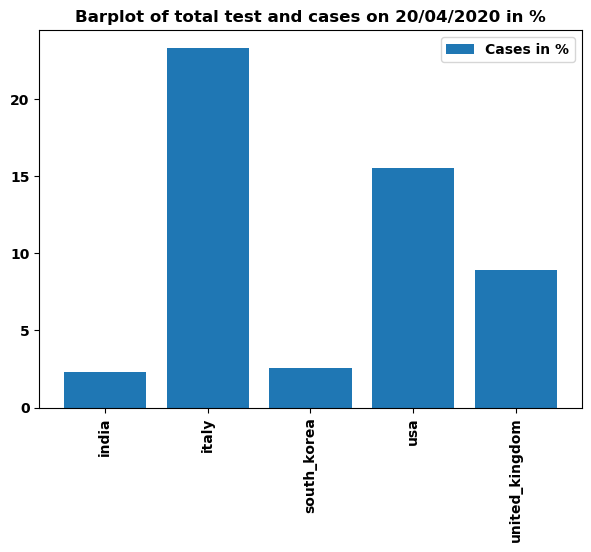

In [10]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-03-24")
    test = 100/state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = test*state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
                     
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

fig, axes = plt.subplots(figsize=(7,5), dpi=100)

plt.bar(df.index, height=df.total_cases)
plt.legend(["Cases in %"])


plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases on 20/04/2020 in %')

# Time series

### Di seguito verranno rappresentati diversi tipi di grafici che si basano su un'analisi temporale.

Comparison between:
<ul>
<li> <b>total cases</b> </li> 
<li> <b>number of test</b> </li>  
</ul>

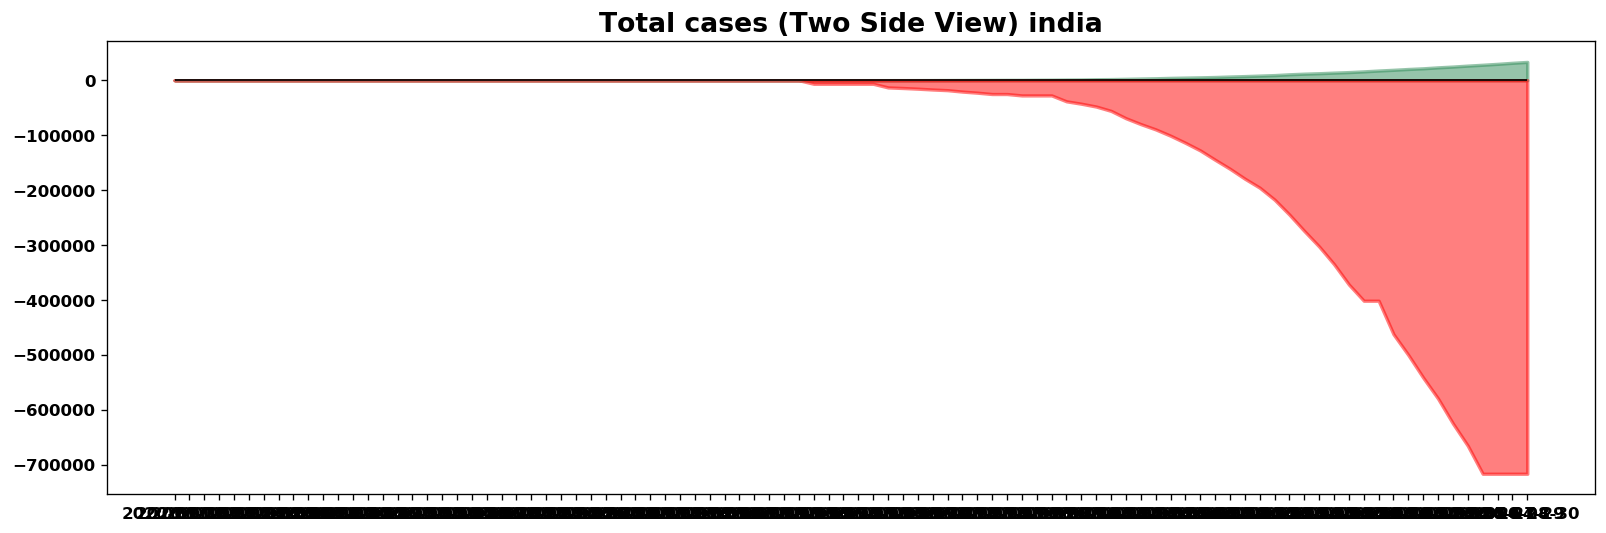

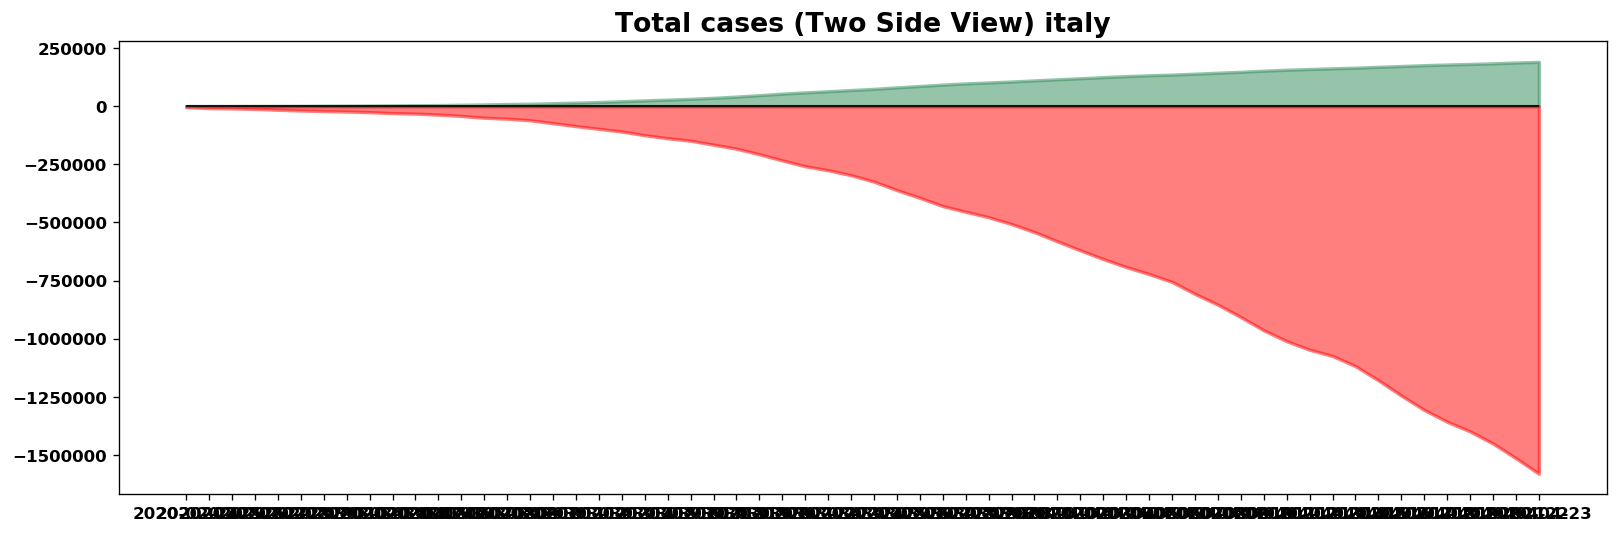

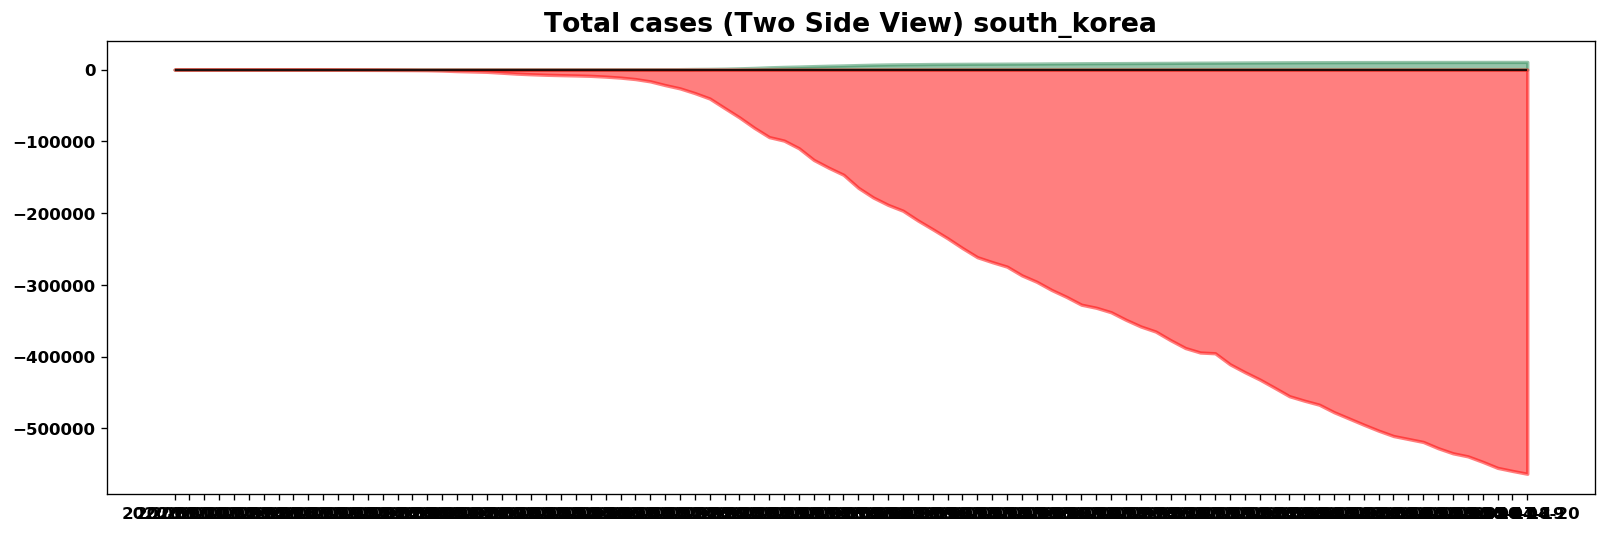

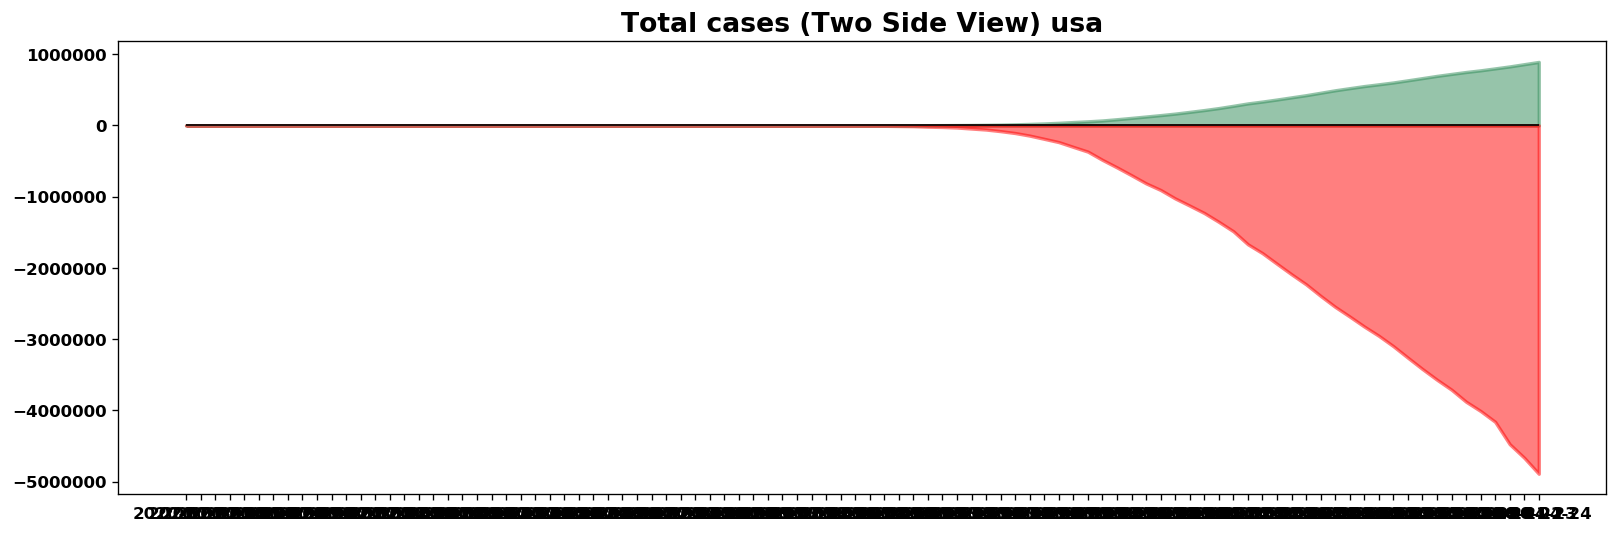

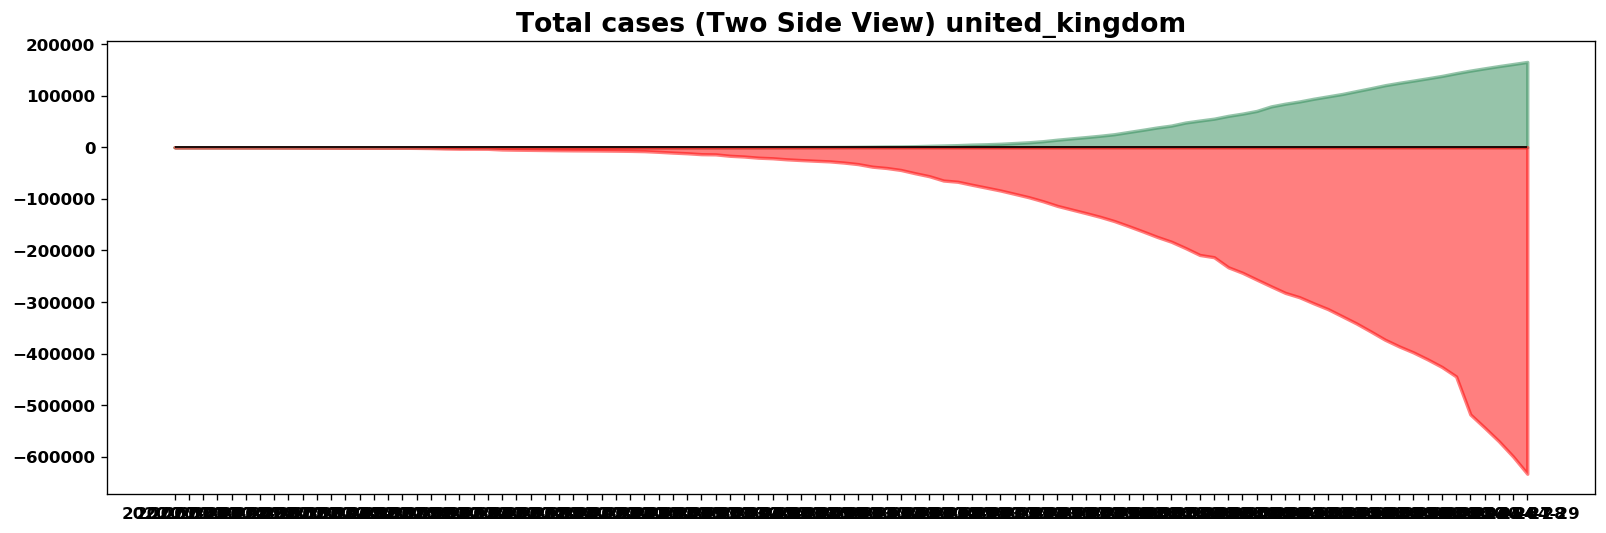

In [11]:
for state in state_csv:
    x = state_csv[state].index
    y1 = state_csv[state].total_cases.values
    y2 = state_csv[state].total_test.values
            
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1,  alpha=0.5, linewidth=2, color='seagreen')
    plt.fill_between(x, y1=-y2, alpha=0.5, linewidth=2, color='red')
    plt.title('Total cases (Two Side View) ' + state, fontsize=16)
    plt.hlines(y=0, xmin=np.min(state_csv[state].index), xmax=np.max(state_csv[state].index), linewidth=1)
    plt.show()

# Lags

<li> Comparison between number of test performed each week</li>
<li> Compare time <b>t</b> with <b>t + x</b> for the number of test performed every week </li>

In [12]:
%cd ..

D:\Programmi\Anaconda\lib\site-packages\IPython\core\magics\execution.py:708: UserWarning: For Windows, use double quotes to wrap a filename: %run "mypath\myfile.py"
  warn('For Windows, use double quotes to wrap a filename: %run "mypath\\myfile.py"')
ERROR:root:File `"'ts'.py"` not found.


C:\Users\Eric Boccati\OneDrive\Università\Data science for business\project


In [22]:
%run -i ts.py

In [23]:
import numpy as np
import pandas as pd

test = state_csv["italy"]
newindex = pd.DatetimeIndex(test.index)
test.index = newindex

Il grafico sottostante rappresenta mette in comparazione il numero di test effettuati giornalmente settimana per settimana
    Cosa vuol dire la l'altezza del box
    Cosa vuol dire la linea in mezzo
    Cosa vuol dire le linee sopra e sotto

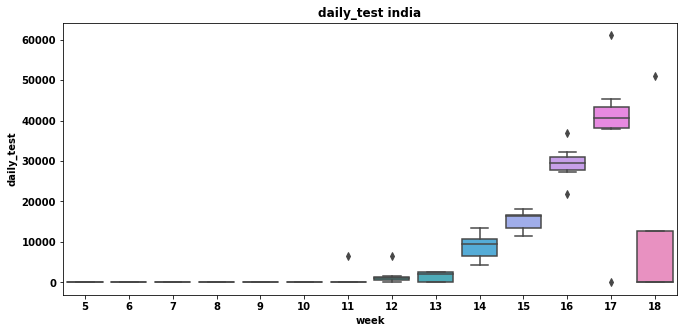

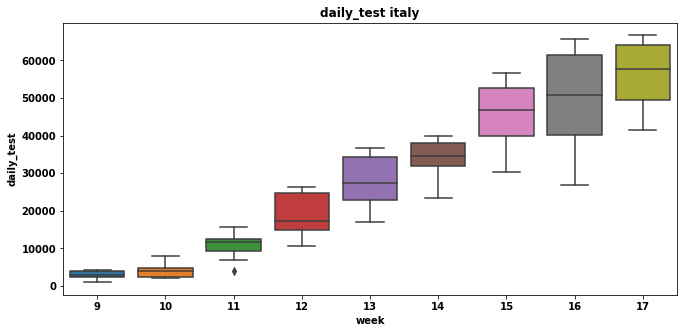

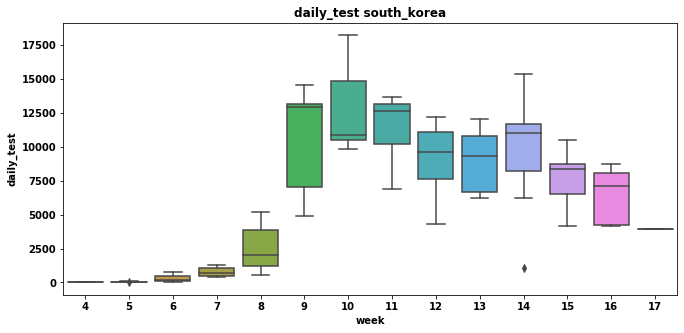

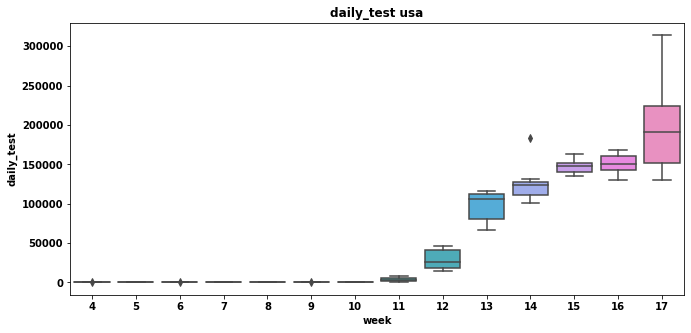

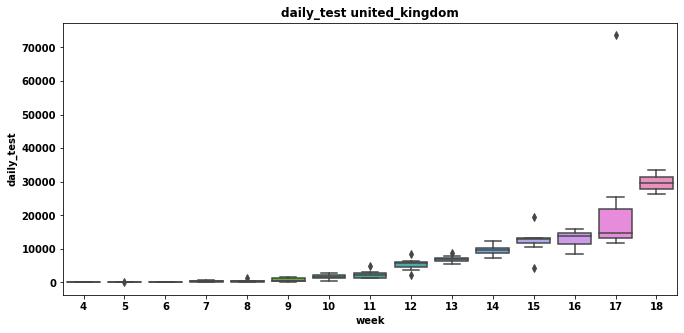

In [26]:
import seaborn as sns

for state in state_csv:
    dummystate = state_csv[state]
    newindex = pd.DatetimeIndex(dummystate.index)
    dummystate.index = newindex
    plot_interval(dummystate, state, ['daily_test'], 'week')

Comparazione del numero di test effettuati giornamente tra settimana <b>x</b> e settimana <b>x + t</b>, consideranto un range di 4 settimane

Gli stati uniti hanno avuto un andamento dei test effettuati giornamente più linere rispetto agli altri paesi

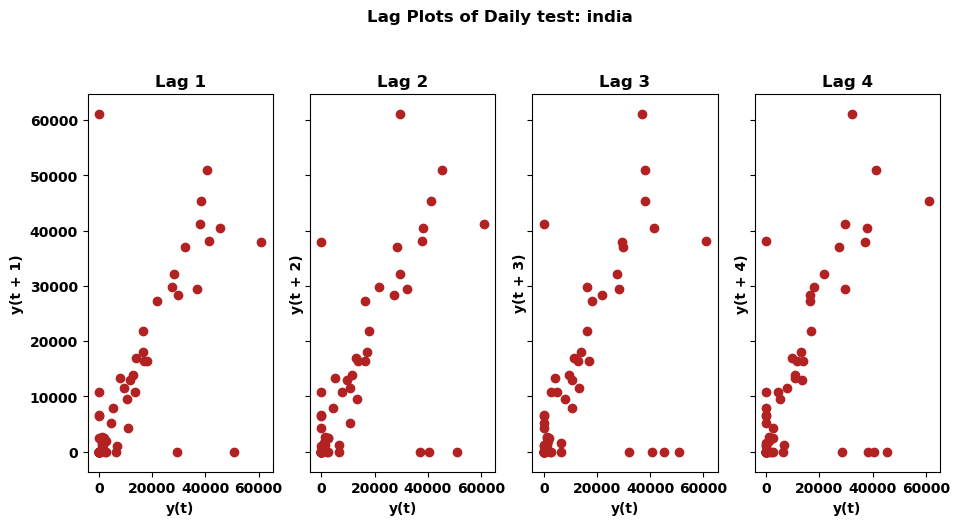

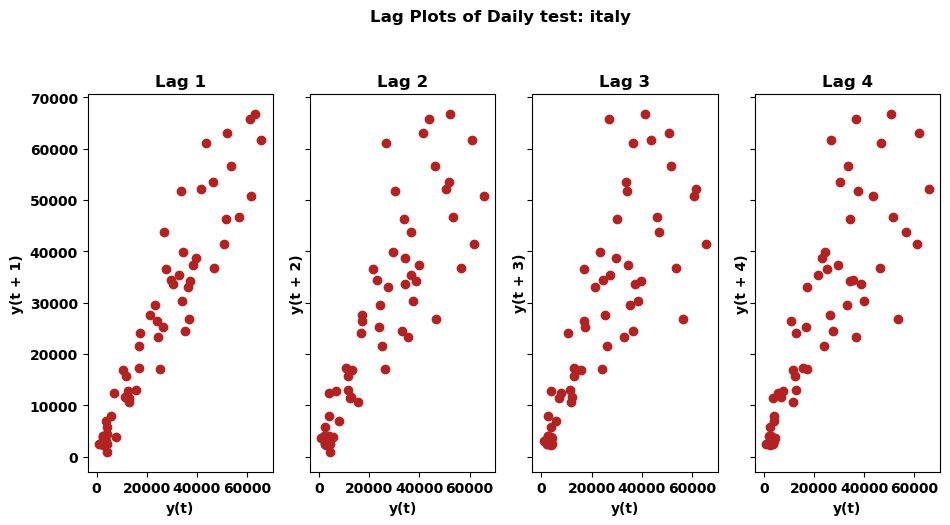

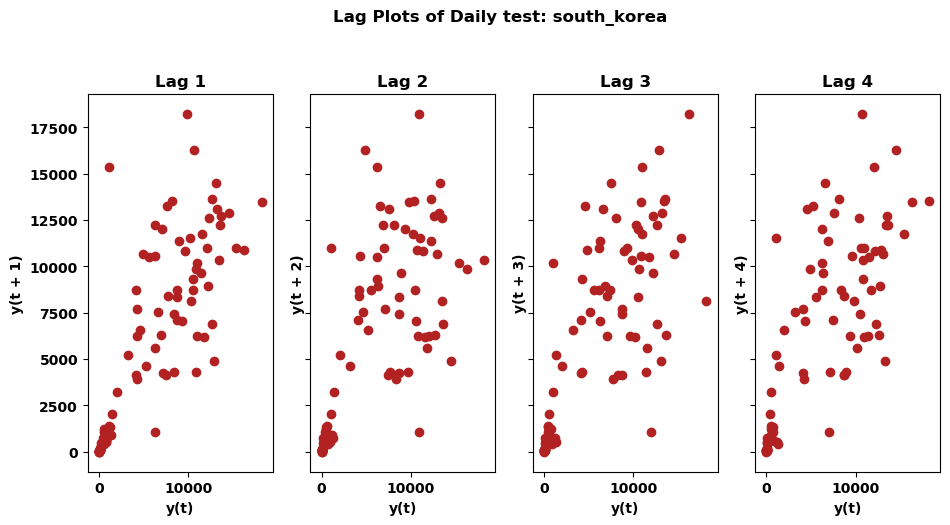

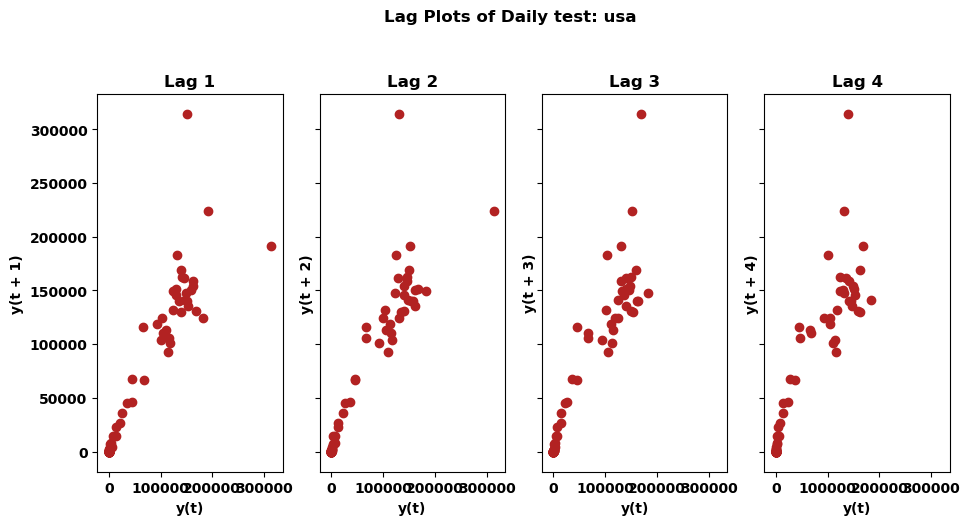

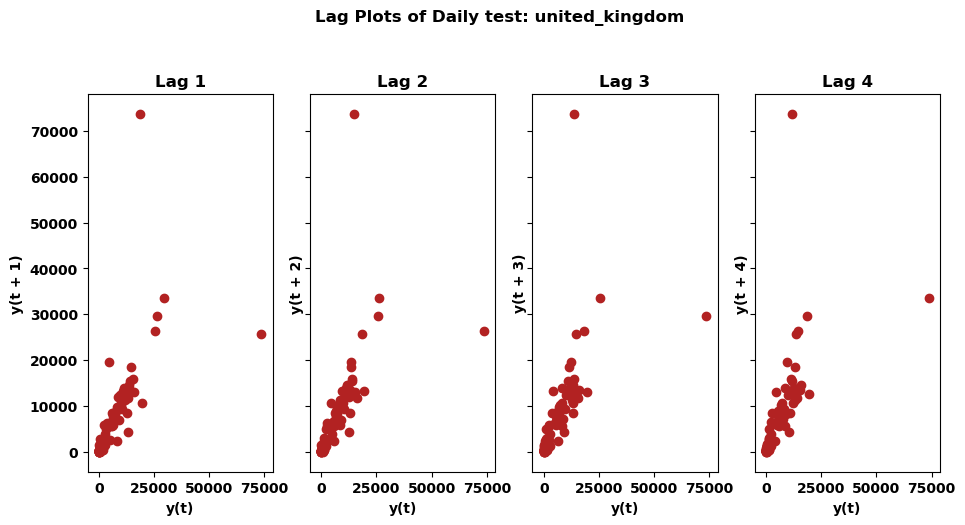

In [27]:
from pandas.plotting import lag_plot

for state in state_csv:
    fig, axes = plt.subplots(1, 4, figsize=(11,5), sharex=True, sharey=True, dpi=100)
    for i, ax in enumerate(axes.flatten()[:4]):
        lag_plot(state_csv[state].daily_test, lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(i+1))

    fig.suptitle('Lag Plots of Daily test: ' + state, y=1.05)    
    plt.show()

L'autocorrelazione mostra come l'incremento del numero di test effettuati giornamente incrementi molto nella parte iniziale dell'epidemia e di come si appiattisca con il passare del tempo

D:\Programmi\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Programmi\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Programmi\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Programmi\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Programmi\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


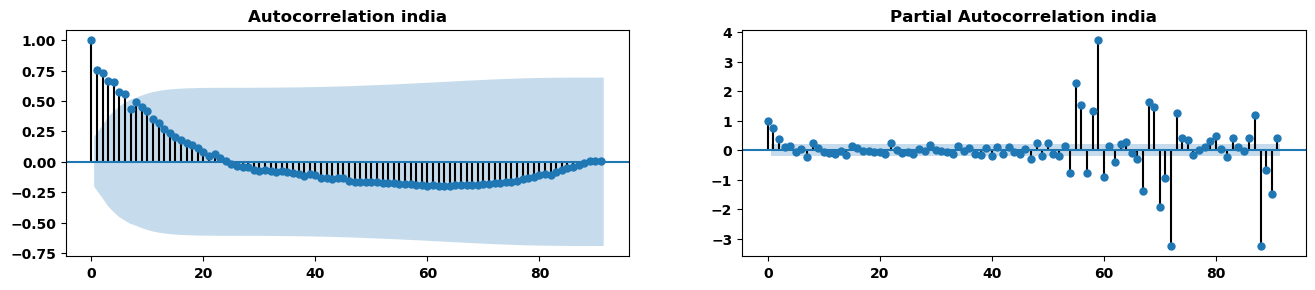

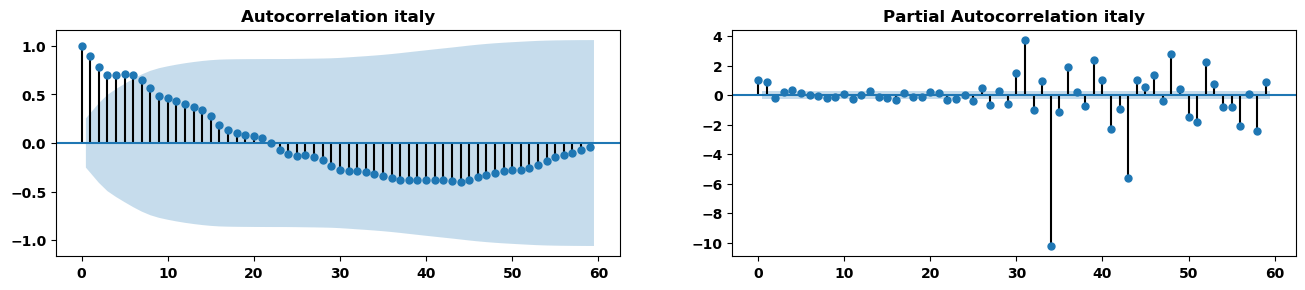

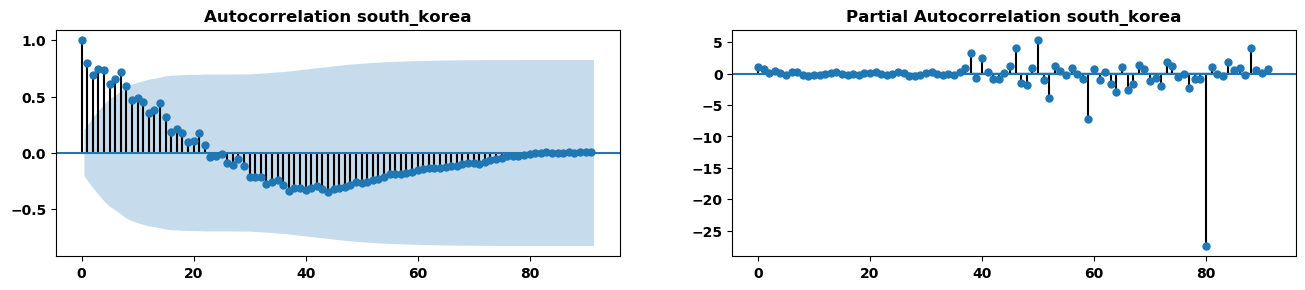

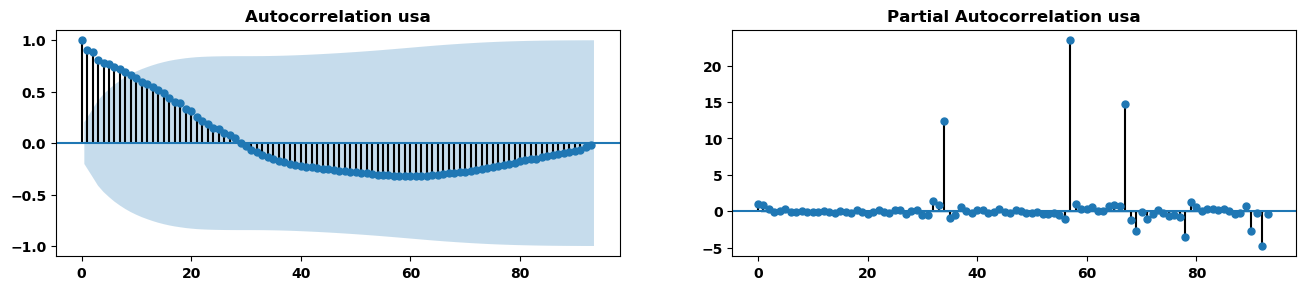

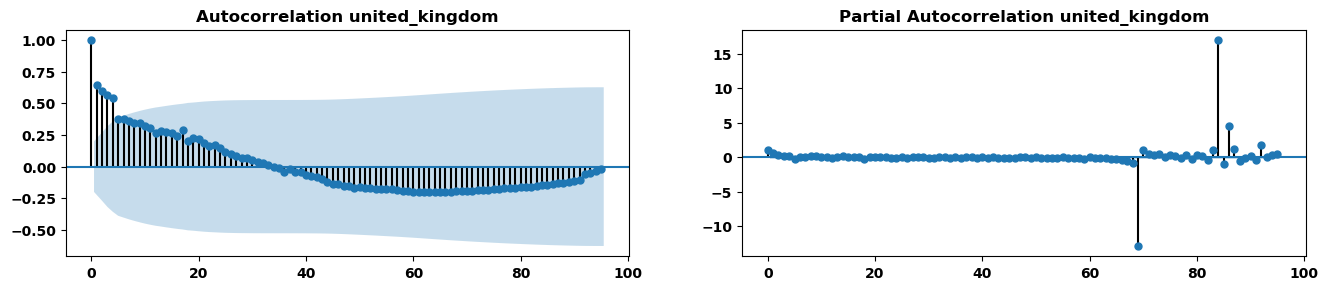

In [28]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for state in state_csv:
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(state_csv[state].daily_test.tolist(), lags=len(state_csv[state].index)-1, ax=axes[0], title= "Autocorrelation " + state)
    plot_pacf(state_csv[state].daily_test.tolist(), lags=len(state_csv[state].index)-1, ax=axes[1], title= "Partial Autocorrelation " + state)

In [29]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, state):
    """
    Check Stationariety of time series.
    Please use np.array or pd.series as Input with your TS data only
    """
    #Convert numpy array to pandas serie
    if type(timeseries) is np.ndarray:
        df_timeseries = pd.Series(timeseries) 
        
    try:
        #Determing rolling statistics
        rolmean = df_timeseries.rolling(window=12).mean()
        rolstd = df_timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation of ' + state)
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        
        # print(dfoutput)
    
        return dftest, dfoutput
    except Exception as message:
        print(f"Impossible to calc the stationariery of your TS: {message}")
        return None, None

Di seguito viene mostrato in relazione con il numero di test effettuati giornalmente con la propria media e deviazione standard

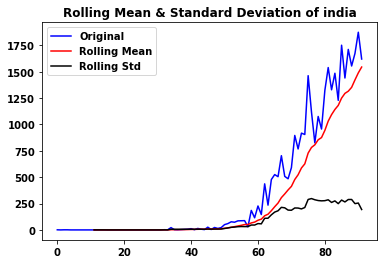

Results of Dickey-Fuller Test:


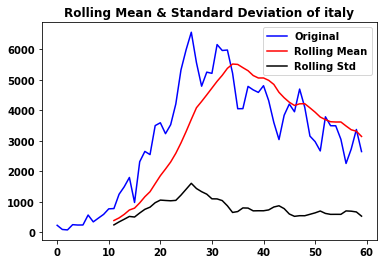

Results of Dickey-Fuller Test:


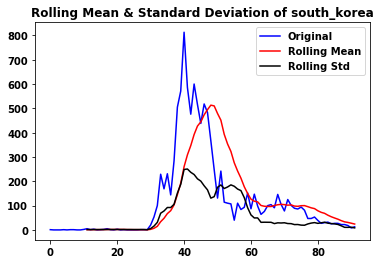

Results of Dickey-Fuller Test:


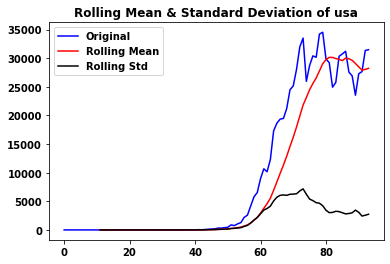

Results of Dickey-Fuller Test:


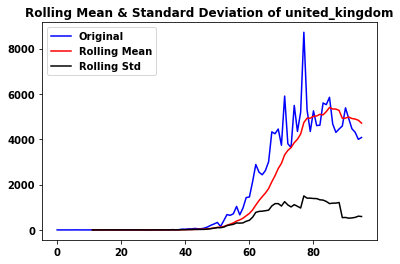

Results of Dickey-Fuller Test:


In [30]:
for state in state_csv:
    dftest, dfoutput = test_stationarity(state_csv[state].daily_cases.values, state)

## Daily cases

<li> The first vertical line indicate the beginning of the state of quarantine </li>
<li> The second vertical line indicate approximately the 15 days of incubation time </li>

## Nations that didn't start a complete level of lockdown:

On 27 March, dozens of <b>Indonesian</b> medical professors have called for “local lockdowns”, saying that the government's policy of physical distancing is not “effective”, so we estimate that as a started date.

The rapid and extensive tests taken by <b>South Korea</b> have been judged successful in limiting the spread of the outbreak, without using the drastic measure of quarantining entire cities. As of 25 February, Daegu officials were aggressively warning residents to take precautions, while allowing private businesses such as restaurants to stay open, we use that date as a started date.

In [31]:
start_of_lockdown = {"india": datetime.datetime(2020,3,25),
                     "italy": datetime.datetime(2020,3,9),
                     "indonesia": datetime.datetime(2020,3,27),
                     "south_korea": datetime.datetime(2020,2,25),
                     "united_kingdom": datetime.datetime(2020,3,23),
                     "usa":datetime.datetime(2020,3,22)}

#INCUBATION TIME
INC_TIME = timedelta(days=15)

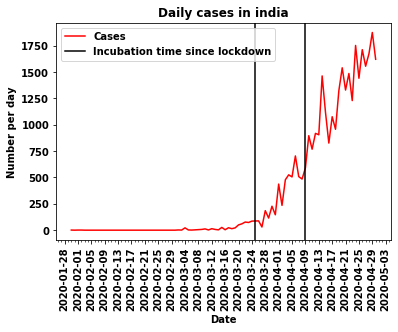

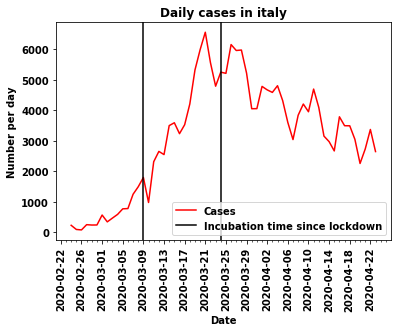

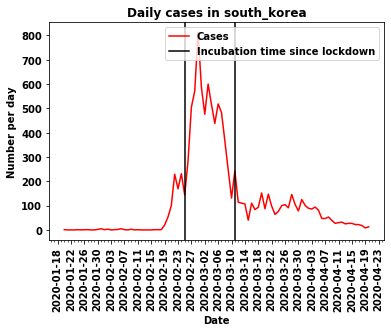

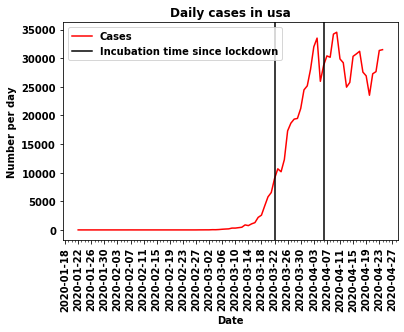

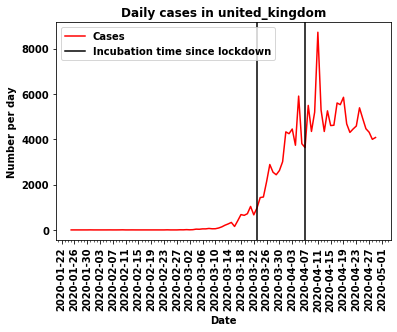

In [32]:
import matplotlib.dates as mdates

for state in states:
    plt.title('Daily cases in ' + state)
    plt.plot(state_csv[state].index, state_csv[state].daily_cases, 'r')

    plt.axvline(start_of_lockdown[state], 0, 1, color = "k")
    plt.axvline(start_of_lockdown[state]+INC_TIME, 0, 1, color = "k")

    plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())

    plt.xlabel('Date')
    plt.ylabel('Number per day')
    plt.legend(["Cases", "Incubation time since lockdown"])
    plt.show()

In order to be able to have the data ready for being processed, we need to merge toghere all our data and add/modify some features:
<li> Add column: Day zero, when the country has reached 100 cases of infected
<li> Add column: Intensity of lockdown
<li> Modifing column: Date, to be useful in our analysis it needs to be expressed as a sin and cosin function

In [33]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [34]:

#data = pd.date_range('2020-01-01', periods=1, freq='D')
mgc = pd.DataFrame()

for state in states:
    temp = state_csv[state].copy()
    day_zero = temp.total_cases[temp["total_cases"]>100].index[0]
    temp["delta_day_zero"] = (temp.index-day_zero).days
    temp['country'] = state
    temp = [temp, mgc]
    mgc = pd.concat(temp , sort=True)
    
temp_mgc = mgc.dropna(axis = 1)
temp_mgc
#mgc.loc[:,mgc.isnull().any()]


,country,daily_cases,daily_dead,daily_test,delta_day_zero,total_cases,total_dead,total_test
date,,,,,,,,
2020-01-25,united_kingdom,0,0,31,-40,0,0,31
2020-01-26,united_kingdom,0,0,21,-39,0,0,52
2020-01-27,united_kingdom,0,0,21,-38,0,0,73
2020-01-28,united_kingdom,0,0,24,-37,0,0,97
2020-01-29,united_kingdom,0,0,33,-36,0,0,130
...,...,...,...,...,...,...,...,...
2020-04-26,india,1712,47,40510,42,26605,826,665819
2020-04-27,india,1555,60,50914,43,28160,886,716733
2020-04-28,india,1674,51,0,44,29834,937,716733


In [35]:
#Settimana dell'anno
#Giorno della settimana

temp_mgc['week_year'] = temp_mgc.index.strftime("%W")
temp_mgc['day_year'] = temp_mgc.index.strftime("%-j")
temp_mgc['day_week'] = temp_mgc.index.strftime("%w")

temp_mgc


ts.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  def find_timegaps(series, gap, gap_comparison='higher', divergent_only=False):
ts.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
ts.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Find time gaps in th

,country,daily_cases,daily_dead,daily_test,delta_day_zero,total_cases,total_dead,total_test,week_year,day_year,day_week
date,,,,,,,,,,,
2020-01-25,united_kingdom,0,0,31,-40,0,0,31,03,2020-01-25 00:00:00,6
2020-01-26,united_kingdom,0,0,21,-39,0,0,52,03,2020-01-26 00:00:00,0
2020-01-27,united_kingdom,0,0,21,-38,0,0,73,04,2020-01-27 00:00:00,1
2020-01-28,united_kingdom,0,0,24,-37,0,0,97,04,2020-01-28 00:00:00,2
2020-01-29,united_kingdom,0,0,33,-36,0,0,130,04,2020-01-29 00:00:00,3
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,india,1712,47,40510,42,26605,826,665819,16,2020-04-26 00:00:00,0
2020-04-27,india,1555,60,50914,43,28160,886,716733,17,2020-04-27 00:00:00,1
2020-04-28,india,1674,51,0,44,29834,937,716733,17,2020-04-28 00:00:00,2


In [36]:
temp_mgc['day_week_sin'] = np.sin(2 * np.pi * temp_mgc['day_week'].astype(int)/6.0)
temp_mgc['day_week_cos'] = np.cos(2 * np.pi * temp_mgc['day_week'].astype(int)/6.0)

ts.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import pandas as pd
ts.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import matplotlib.pyplot as plt


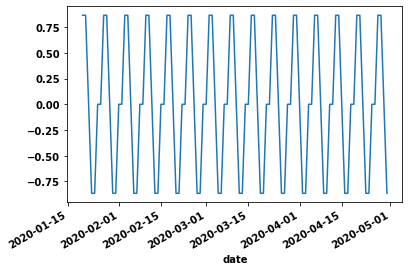

In [37]:
ax = temp_mgc['day_week_sin'].plot()

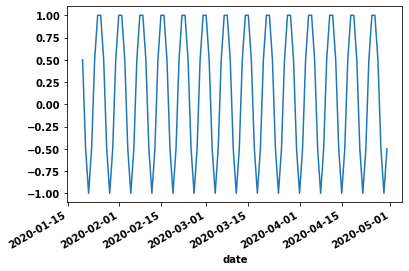

In [38]:
ax = temp_mgc['day_week_cos'].plot()

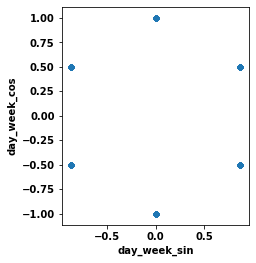

In [39]:
ax = temp_mgc.plot.scatter('day_week_sin', 'day_week_cos').set_aspect('equal')

In [40]:
#Colonna livello di chiusura da 0 a 10